Loading and exploring the data:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Postal Code'] = df['Postal Code'].astype(str)

In [6]:
cols = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode', 'Country', 'City', 'State', 'Region']

for col in cols:
    df[col] = df[col].astype('category')


In [ ]:
df.info()

In [8]:
df = df.drop_duplicates()

Analyzing the data:

In [86]:
#KPIs:
#Total Sales
total_sales = df['Sales'].sum()
#Total Profit
total_profit = df['Profit'].sum()
#Total Orders
total_orders = df['Order ID'].nunique()
print(total_orders)
#Profit Margin %
profit_margin = total_profit / total_sales * 100

5009


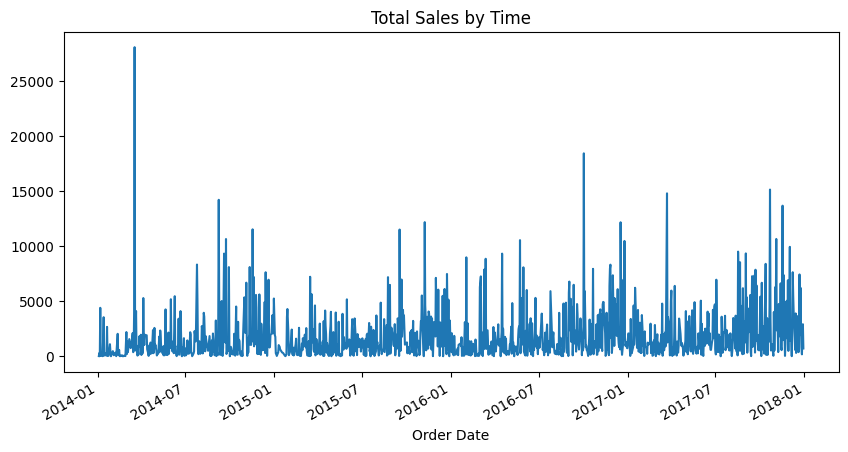

In [37]:
#Total Sales by Time 
df.groupby('Order Date')['Sales'].sum().plot(figsize=(10,5), title="Total Sales by Time")
plt.show()

In [ ]:
#Customer Analysis:
#No of Customers
customers = df['Customer ID'].nunique()
#Total Sales by Segment
sales_by_segment = round(df.groupby('Segment')['Sales'].sum(), 2)
#Top 5 Customers by Profit
top_customers_by_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(5)
#Bottom 5 Customers by Profit 
bot_customers_by_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=True).head(5)

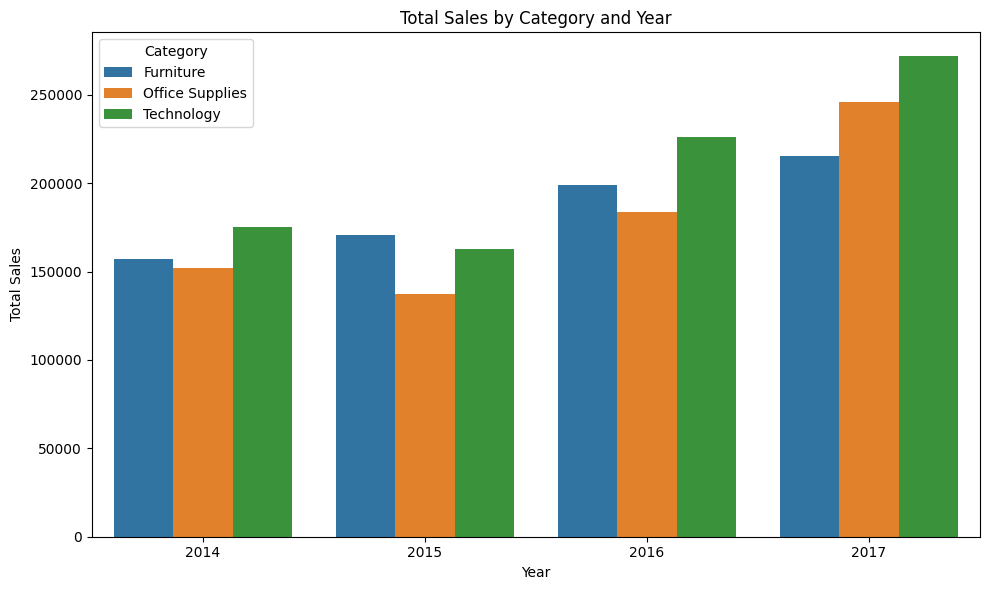

In [73]:
#Product Analysis:
#Top 10 Products by Sales
top_products_by_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
#Top 10 Products by Profit
top_products_by_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
#Top 10 Products by Quantity
top_products_by_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
#Total Sales by Category and Year
df['Year'] = df['Order Date'].dt.year

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='Year',
    y='Sales',
    hue='Category',
    estimator=sum,
    errorbar=None
)

plt.title("Total Sales by Category and Year")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.legend(title="Category")
plt.tight_layout()
plt.show()


In [ ]:
#Regional Performance:
#Average Shipping Time (Days)
avg_shipping_time = (df['Ship Date'] - df['Order Date']).dt.days.mean()
#Total Orders by Region
total_orders_by_region = df.groupby('Region')['Order ID'].nunique()
#Total Sales by Region
total_sales_by_region = df.groupby('Region')['Sales'].sum()
#Total Profit by Region
total_profit_by_region = df.groupby('Region')['Profit'].sum()
#No of Orders by Year and Region
df['Year'] = df['Order Date'].dt.year

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='Year',
    hue='Region'
)

plt.title("Total Orders by Region and Year")
plt.ylabel("Total Orders")
plt.xlabel("Year")
plt.legend(title="Region")
plt.tight_layout()
plt.show()